# 1) Problem statement.

APS Failure at Scania Trucks Data Set
The dataset consists of data collected from heavy Scania
trucks in everyday usage. The system in focus is the
Air Pressure system (APS) which generates pressurised
air that are utilized in various functions in a truck,
such as braking and gear changes. The datasets'
positive class consists of component failures
for a specific component of the APS system.
The negative class consists of trucks with failures
for components not related to the APS.

Following regression models are used in the dataset along with Hyperparameter tuning is done using GridSearchCV
1.	Logistic regression
2.	SVM
3.	Decision tree
4.	Random forest
5.	Adaboost
6.	gradient boost
7.	XGboost

In [1]:
# Import all the required libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import scikitplot as skplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix, classification_report,roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# 2) Data Collection.

In [3]:
# import the training and testing csv files into seperate dataframes

In [4]:
df_train=pd.read_csv("original csv files/aps_failure_training_set.csv",na_values="na")
df_test=pd.read_csv("original csv files/aps_failure_test_set.csv",na_values="na")

In [5]:
print("Shape of the datasets...")
print("Shape of train dataset:",df_train.shape)
print("Shape of the test dataset:",df_test.shape)

Shape of the datasets...
Shape of train dataset: (60000, 171)
Shape of the test dataset: (16000, 171)


In [6]:
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [7]:
df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


# 3. EDA

In [41]:
# define numerical & categorical columns in training dataset
numeric_features = [feature for feature in df_train.columns if df_train[feature].dtype != 'O']
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 171 numerical features : ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000',

In [42]:
# define numerical & categorical columns in testing dataset
numeric_features = [feature for feature in df_test.columns if df_test[feature].dtype != 'O']
categorical_features = [feature for feature in df_test.columns if df_test[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 171 numerical features : ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000',

### Check Multicollinearity in Numerical features

In [79]:
df_train[(list(df_train.columns)[1:])].corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.029905,-0.020777,-0.001110,0.046259,0.066789,0.018541,0.142624,0.284759,0.493699,...,0.732465,0.736337,0.715019,0.724412,0.724157,0.603875,0.469873,0.247075,0.014128,0.026386
ab_000,0.029905,1.000000,-0.009774,0.000068,0.028885,0.044009,0.000588,0.006949,0.022347,0.034921,...,0.022974,0.038026,0.028289,0.025605,0.023169,0.011406,0.002352,0.000619,0.051710,0.104345
ac_000,-0.020777,-0.009774,1.000000,-0.002285,-0.004944,-0.010270,0.017524,-0.000671,-0.008976,-0.023478,...,-0.009280,-0.005859,-0.007236,-0.006898,-0.014152,-0.019008,0.011781,0.019416,-0.006165,0.014228
ad_000,-0.001110,0.000068,-0.002285,1.000000,-0.000209,-0.000257,-0.000047,-0.000055,-0.000119,-0.000276,...,-0.001015,-0.001057,-0.001046,-0.000848,-0.000862,-0.000518,-0.000932,-0.000578,-0.000095,-0.000114
ae_000,0.046259,0.028885,-0.004944,-0.000209,1.000000,0.823108,-0.000428,-0.000589,0.003214,0.024237,...,0.012989,0.019364,0.013754,0.028607,0.063056,0.037821,-0.008457,-0.006774,0.070835,0.041685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.603875,0.011406,-0.019008,-0.000518,0.037821,0.050743,0.000307,0.044161,0.182666,0.505081,...,0.454833,0.446803,0.437682,0.379892,0.545929,1.000000,0.224938,0.061478,-0.000498,0.001841
ee_008,0.469873,0.002352,0.011781,-0.000932,-0.008457,-0.010884,-0.000823,0.004875,0.009449,0.021131,...,0.453811,0.481392,0.459517,0.406920,0.373871,0.224938,1.000000,0.710056,-0.005422,-0.002200
ee_009,0.247075,0.000619,0.019416,-0.000578,-0.006774,-0.008442,-0.001230,-0.004307,-0.009481,-0.019292,...,0.228248,0.239302,0.224638,0.190667,0.163792,0.061478,0.710056,1.000000,-0.003256,-0.000750
ef_000,0.014128,0.051710,-0.006165,-0.000095,0.070835,0.106271,-0.000072,0.002032,0.007393,0.013960,...,0.005132,0.013148,0.004479,0.033649,0.005946,-0.000498,-0.005422,-0.003256,1.000000,0.282184


In [78]:
df_test[(list(df_test.columns)[1:])].corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019444,-0.006617,0.031419,0.015167,0.017624,0.019825,0.049625,0.158403,0.219714,...,0.239466,0.249334,0.246395,0.259907,0.273724,0.240724,0.140579,0.067196,0.000891,0.000810
ab_000,0.019444,1.000000,-0.017045,0.062086,-0.002536,0.038966,0.000855,0.009275,0.032091,0.043480,...,0.036754,0.034471,0.032621,0.075009,0.028870,0.025504,0.002632,0.000027,0.015675,0.004462
ac_000,-0.006617,-0.017045,1.000000,0.045770,-0.004066,-0.012439,0.002336,-0.005390,-0.011258,-0.022029,...,-0.011678,-0.008492,-0.010510,-0.012250,-0.016545,-0.017161,0.006316,0.010281,-0.006485,0.020807
ad_000,0.031419,0.062086,0.045770,1.000000,0.013300,0.027942,0.004724,0.010488,0.028874,0.050226,...,0.147115,0.108575,0.079741,0.066254,0.071098,0.039219,0.035682,0.029120,0.008687,0.003544
ae_000,0.015167,-0.002536,-0.004066,0.013300,1.000000,0.876924,-0.000844,-0.000958,-0.001699,0.010268,...,0.012493,0.021038,0.009430,0.018607,0.087536,0.031079,-0.008903,-0.008270,0.015457,0.004222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.240724,0.025504,-0.017161,0.039219,0.031079,0.025743,0.104795,0.126191,0.197287,0.411138,...,0.399384,0.384214,0.356663,0.385610,0.541135,1.000000,0.239195,0.069442,0.000663,-0.001151
ee_008,0.140579,0.002632,0.006316,0.035682,-0.008903,-0.011336,0.009131,0.006737,0.008485,0.019568,...,0.411310,0.440831,0.417621,0.358385,0.343195,0.239195,1.000000,0.635397,-0.004474,-0.001549
ee_009,0.067196,0.000027,0.010281,0.029120,-0.008270,-0.009309,-0.000612,-0.003305,-0.008657,-0.015639,...,0.213396,0.225239,0.208995,0.163527,0.143067,0.069442,0.635397,1.000000,-0.002910,-0.001760
ef_000,0.000891,0.015675,-0.006485,0.008687,0.015457,0.015409,-0.000276,0.000102,0.001308,0.001899,...,-0.002375,-0.002772,-0.003488,-0.000538,0.002873,0.000663,-0.004474,-0.002910,1.000000,0.090941


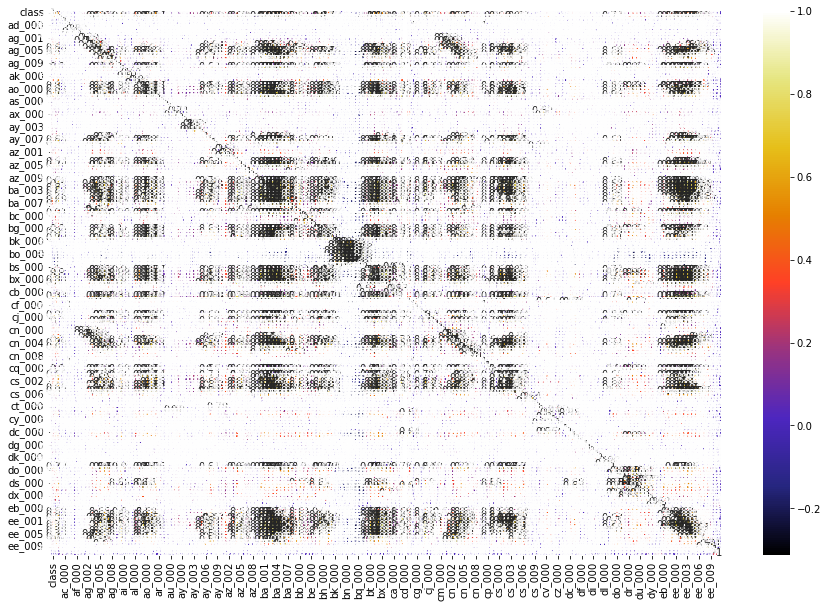

In [80]:
plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(), cmap="CMRmap", annot=True)
plt.show()

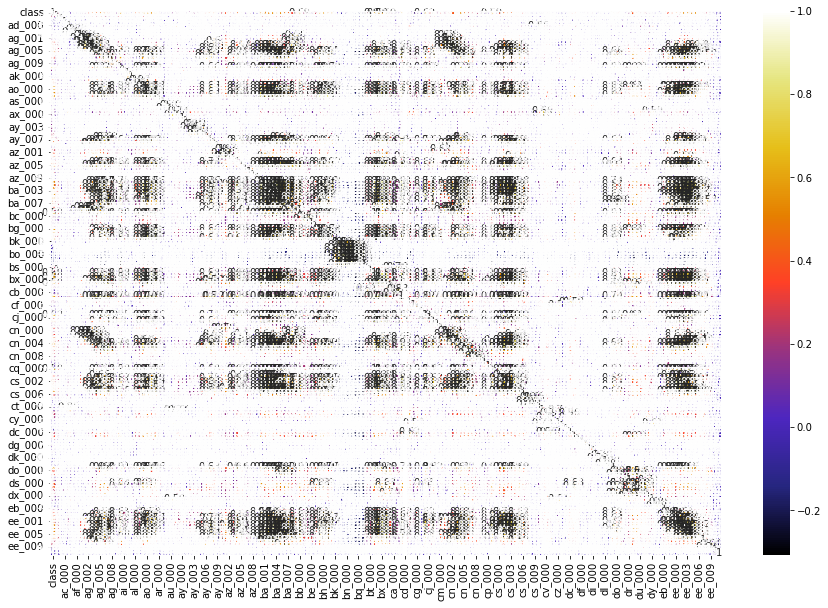

In [81]:
plt.figure(figsize = (15,10))
sns.heatmap(df_test.corr(), cmap="CMRmap", annot=True)
plt.show()

## 4. Visualization

### 4.1 Visualize the Target Feature

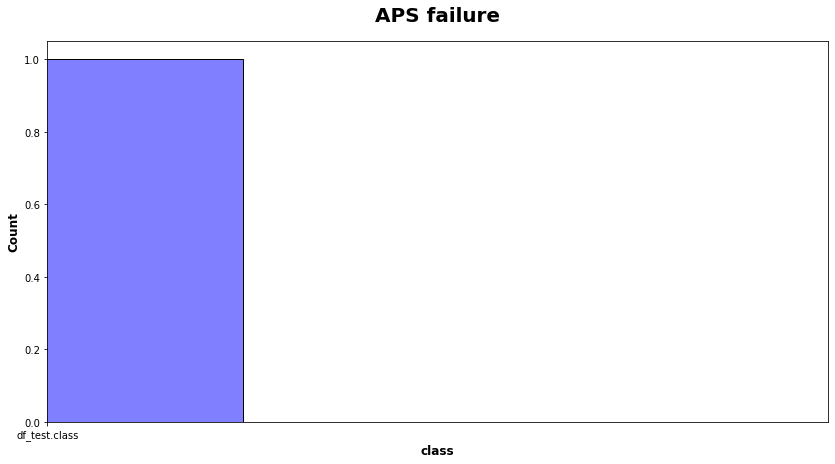

In [89]:
plt.subplots(figsize=(14,7))
sns.histplot('df_train.class', bins=200, kde=True, color = 'b')
plt.title("APS failure", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("class", weight="bold", fontsize=12)
plt.xlim(0,2)
plt.show()

# 5. Preprocessing

In [8]:
# mapping class column pos to 1 and neg to 0

In [9]:
df_train['class'] = df_train['class'].apply(lambda x: 1 if x=='pos' else 0)

In [10]:
df_test['class'] = df_test['class'].apply(lambda x: 1 if x=='pos' else 0)

In [11]:
df_train['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [12]:
df_test['class'].value_counts()

0    15625
1      375
Name: class, dtype: int64

In [13]:
# Handling duplicates

In [14]:
df_train.duplicated().sum()  

0

There is one duplicate row in train dataset. it needs to be removed

In [15]:
df_train=df_train.drop_duplicates()  # remove the duplicates

In [16]:
df_test.duplicated().sum()

0

In [17]:
# Handle missing values. Fill missing values with the mean of the column

In [18]:
df_train = df_train.fillna(df_train.mean())

In [19]:
df_test = df_test.fillna(df_test.mean())

In [20]:
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [21]:
df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


# Apply feature scaling to the training and testing datasets

In [23]:
min_max = MinMaxScaler()

In [24]:
df_train_scale = pd.DataFrame(data = min_max.fit_transform(df_train) , columns = df_train.columns )

In [25]:
df_train_scale.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,0.027925,0.003496,9.999998e-01,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.0,0.012036,0.003496,0.000000e+00,2.220573e-05,0.0,0.000000,0.0,0.0,0.0,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0.0,0.014942,0.003496,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0.0,0.000004,0.000000,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0.0,0.022164,0.003496,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


In [26]:
df_test_scale = pd.DataFrame(data = min_max.fit_transform(df_test) , columns = df_test.columns )

In [27]:
df_test_scale.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,0.000001,0.000000,9.386558e-09,0.000138,0.0,0.0,0.0,0.0,0.0,...,0.000020,0.000006,0.000008,0.000012,0.000002,0.000002,0.000000,0.000000,0.0,0.0
1,0.0,0.000002,0.000000,3.191430e-08,0.000460,0.0,0.0,0.0,0.0,0.0,...,0.000020,0.000013,0.000033,0.000002,0.000002,0.000010,0.000000,0.000000,0.0,0.0
2,0.0,0.001537,0.034483,9.949751e-08,0.001287,0.0,0.0,0.0,0.0,0.0,...,0.009198,0.017227,0.009057,0.004810,0.031192,0.003237,0.000030,0.000000,0.0,0.0
3,0.0,0.001393,0.013311,4.740212e-07,0.010754,0.0,0.0,0.0,0.0,0.0,...,0.010048,0.011018,0.009945,0.008660,0.010232,0.004425,0.016389,0.000707,0.0,0.0
4,0.0,0.000042,0.013311,7.321515e-08,0.001608,0.0,0.0,0.0,0.0,0.0,...,0.000142,0.000188,0.000380,0.000888,0.000075,0.000010,0.000004,0.000000,0.0,0.0


In [28]:
print(df_train_scale.shape,df_test_scale.shape)

(60000, 171) (16000, 171)


# Splitting of the Data

In [29]:
# Train dataset
y_train = df_train_scale['class']
X_train = df_train_scale.drop('class', axis=1)

In [30]:
#Test dataset
y_test = df_test_scale['class']
X_test = df_test_scale.drop('class', axis=1)

# 6. Model building

## Logistic Regression

In [90]:
LogReg_Model = LogisticRegression()

In [91]:
LogReg_Model.fit(X_train,y_train)

LogisticRegression()

In [92]:
y_pred = LogReg_Model.predict(X_test)

In [93]:
lg_accuracy = accuracy_score(y_test,y_pred)

In [94]:
lg_accuracy

0.9806875

## SVM

In [95]:
svm_model = SVR()

In [96]:
svm_model.fit(X_train, y_train)

SVR()

In [97]:
svm_model.score(X_train, y_train)

0.6553439449310702

In [101]:
y_pred = svm_model.predict(X_test)

In [102]:
r2_score_SVM = r2_score(y_test,y_pred)

In [104]:
svm_score = r2_score_SVM

In [105]:
svm_score

0.36627476285880933

## Decision tree

In [106]:
DecisionTree_model=DecisionTreeClassifier()

In [107]:
DecisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
DecisionTree_model.score(X_train,y_train)

1.0

In [109]:
# check the accuracy score on the testing data

In [110]:
dtn_score = DecisionTree_model.score(X_test,y_test)

In [111]:
dtn_score

0.9838125

# Hyper parameter tuning in decision tree

In [44]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [45]:
grid_search=GridSearchCV(estimator=DecisionTree_model,param_grid=grid_param,cv=3,verbose=1)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


In [ ]:
grid_search.best_params_

In [ ]:
model_with_best_params=DecisionTreeClassifier()

In [ ]:
model_with_best_params.fit(X_train,y_train)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [ ]:
y_pred = model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

# Random Forest Classifier

In [112]:
Rf_model=RandomForestClassifier()

In [113]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [114]:
y_pred=Rf_model.predict(X_test)

In [136]:
RFC_score = accuracy_score(y_test,y_pred)

In [137]:
RFC_score

0.989625

# Hyper parameter tuning in Random Forest Classifier

In [198]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
grid_search=GridSearchCV(estimator=Rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
Rf_model_with_best_params=RandomForestClassifier()

In [ ]:
Rf_model_with_best_params.fit(X_train,y_train)

In [ ]:
y_pred=Rf_model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

## Adaboost

In [117]:
adaboostclassifier_model = AdaBoostClassifier(random_state=96)

In [118]:
adaboostclassifier_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=96)

In [119]:
# check the accuracy score on the training data

In [120]:
adaboostclassifier_model.score(X_train,y_train)

0.9921333333333333

In [121]:
# check the accuracy score on the testing data

In [122]:
abc_score = adaboostclassifier_model.score(X_test,y_test)

In [123]:
abc_score

0.9801875

# Hyper parameter tuning with Adaboost

In [ ]:
grid_param = {
'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]
}

In [ ]:
grid_search=GridSearchCV(estimator=adaboostclassifier_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
AdaBoost_model_with_best_params=AdaBoostClassifier()

In [ ]:
AdaBoost_model_with_best_params.fit(X_train,y_train)

In [ ]:
y_pred=AdaBoost_model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

## gradient boost

In [124]:
gbm_model=GradientBoostingClassifier()

In [125]:
gbm_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [126]:
y_pred=gbm_model.predict(X_test)

In [127]:
# check the accuracy score on the testing data

In [128]:
gb_score = accuracy_score(y_test,y_pred)

In [129]:
gb_score

0.986

# Hyperparameter tuning with Gradient boost model

In [ ]:
grid_param = {
    "learning_rate":[0.01,0.001,0.1,0.0001],
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
grid_search=GridSearchCV(estimator=gbm_model,param_grid=grid_param,cv=5,verbose=2,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
gbm_model_with_best_params=GradientBoostingClassifier()

In [ ]:
y_pred=gbm_model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

## XGboost

In [130]:
xgb_model=xgboost.XGBClassifier()

In [131]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [132]:
y_pred=xgb_model.predict(X_test)

In [133]:
# check the accuracy score on the testing data

In [134]:
xgb_score = accuracy_score(y_test,y_pred)

In [135]:
xgb_score

0.989625

# Hyperparameter tuning with XGboost

In [ ]:
grid_param = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 10, 100]
    }

In [ ]:
grid_search=GridSearchCV(estimator=xgb_model,param_grid=grid_param,cv=5,verbose=2,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
xgb_model_with_best_params=xgboost.XGBClassifier()

In [ ]:
y_pred=xgb_model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [138]:
print("Logistics regression accuracy score : ",lg_accuracy)
print("SVM accuracy score : ",svm_score)
print("Decision Tree accuracy score : ",dtn_score)
print("Random Forest Classifier accuracy score : ",RFC_score)
print("ada boost accuracy score : ",abc_score)
print("gradient boost accuracy score : ",gb_score)
print("xgboost accuracy score : ",xgb_score)

Logistics regression accuracy score :  0.9806875
SVM accuracy score :  0.36627476285880933
Decision Tree accuracy score :  0.9838125
Random Forest Classifier accuracy score :  0.989625
ada boost accuracy score :  0.9801875
gradient boost accuracy score :  0.986
xgboost accuracy score :  0.989625


In [139]:
# Random Forest Classifier & XGBoost models gives the highest accuracy score at 98.9625%